# Decision Tree

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
dt= pd.read_csv("Fraud_check.csv")

In [3]:
dt

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
dt.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
dt.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

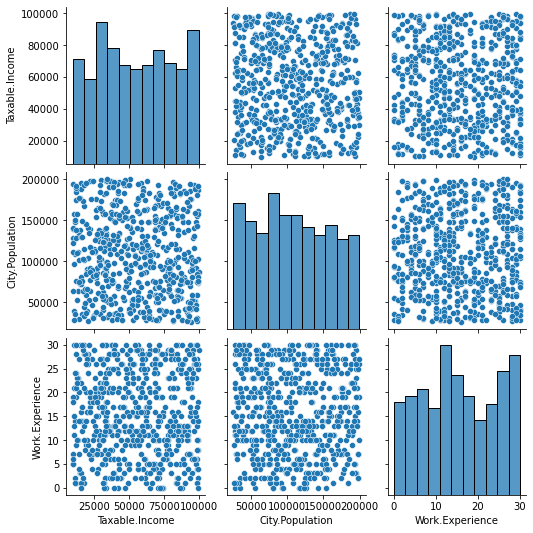

In [7]:
sns.pairplot(dt)

In [11]:
dt.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


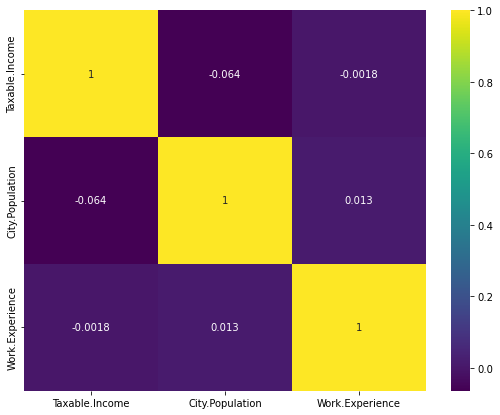

In [12]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(dt.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [13]:
dt=pd.get_dummies(dt,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [14]:
dt

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [15]:
dt["TaxInc"] = pd.cut(dt["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
dt.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
590,43018,85195,14,0,1,0,1,Good
591,27394,132859,18,1,0,1,1,Risky
592,68152,75143,16,1,0,1,0,Good
593,84775,131963,10,0,0,0,1,Good
594,47364,97526,9,0,1,0,1,Good
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good
599,96519,158137,16,0,0,0,0,Good


In [16]:
#Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [17]:
dt = pd.get_dummies(dt,columns = ["TaxInc"],drop_first=True)

In [18]:
dt

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


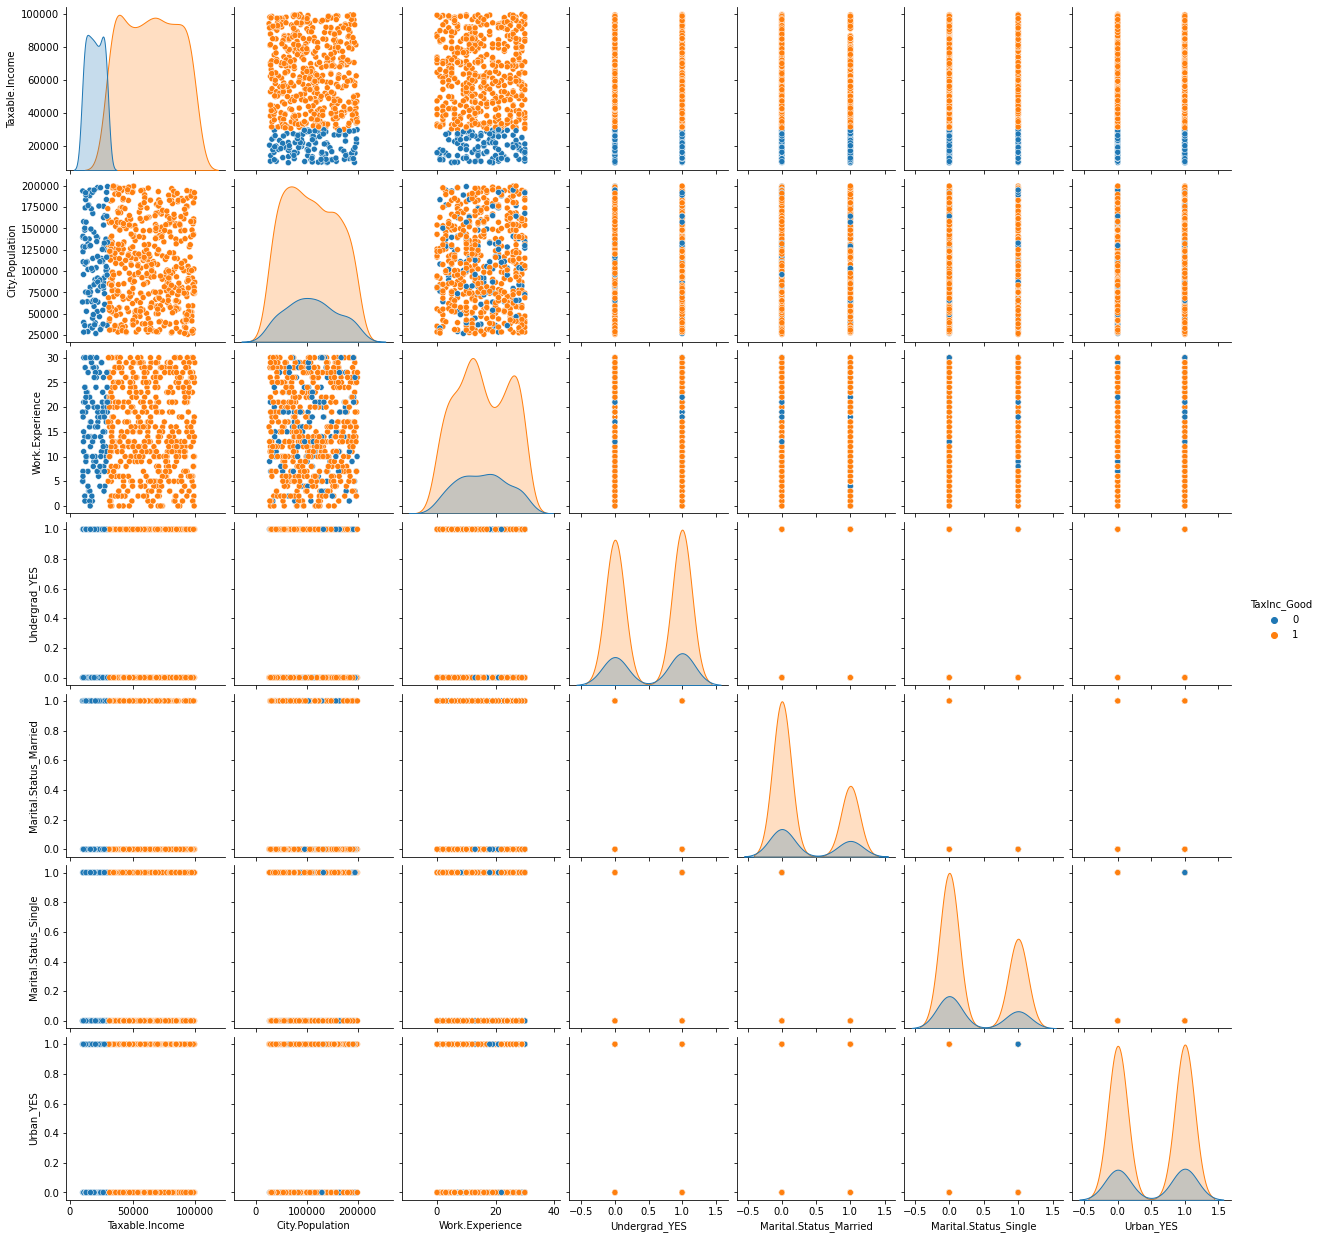

In [19]:
sns.pairplot(data=dt, hue = 'TaxInc_Good')

In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
dt_norm = norm_func(dt.iloc[:,1:])
dt_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [22]:
x = dt_norm.drop(['TaxInc_Good'], axis=1)
y = dt_norm['TaxInc_Good']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [25]:
dt_norm["income"]="<=30000"
dt_norm.loc[dt["Taxable.Income"]>=30000,"income"]="Good"
dt_norm.loc[dt["Taxable.Income"]<=30000,"income"]="Risky"

In [26]:
dt.drop(["Taxable.Income"],axis=1,inplace=True)

In [27]:
dt.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in dt.columns:
    if dt[column_name].dtype == object:
        dt[column_name] = le.fit_transform(dt[column_name])
    else:
        pass

In [29]:
features = dt.iloc[:,0:5]
labels = dt.iloc[:,5]

In [30]:
colms_names = list(dt.columns)
predictors = colms_names[0:5]
target = colms_names[5]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


# Building decision tre classifier using entropy criteria

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
from sklearn import tree

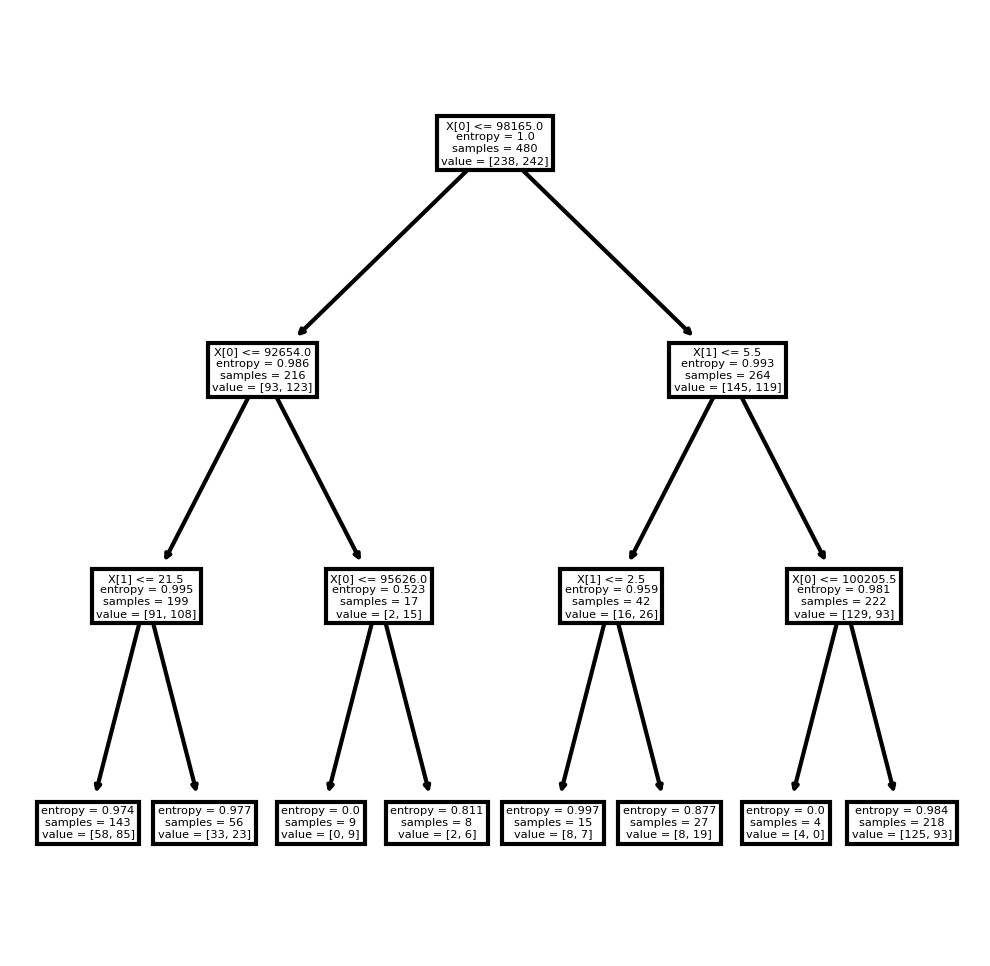

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model);

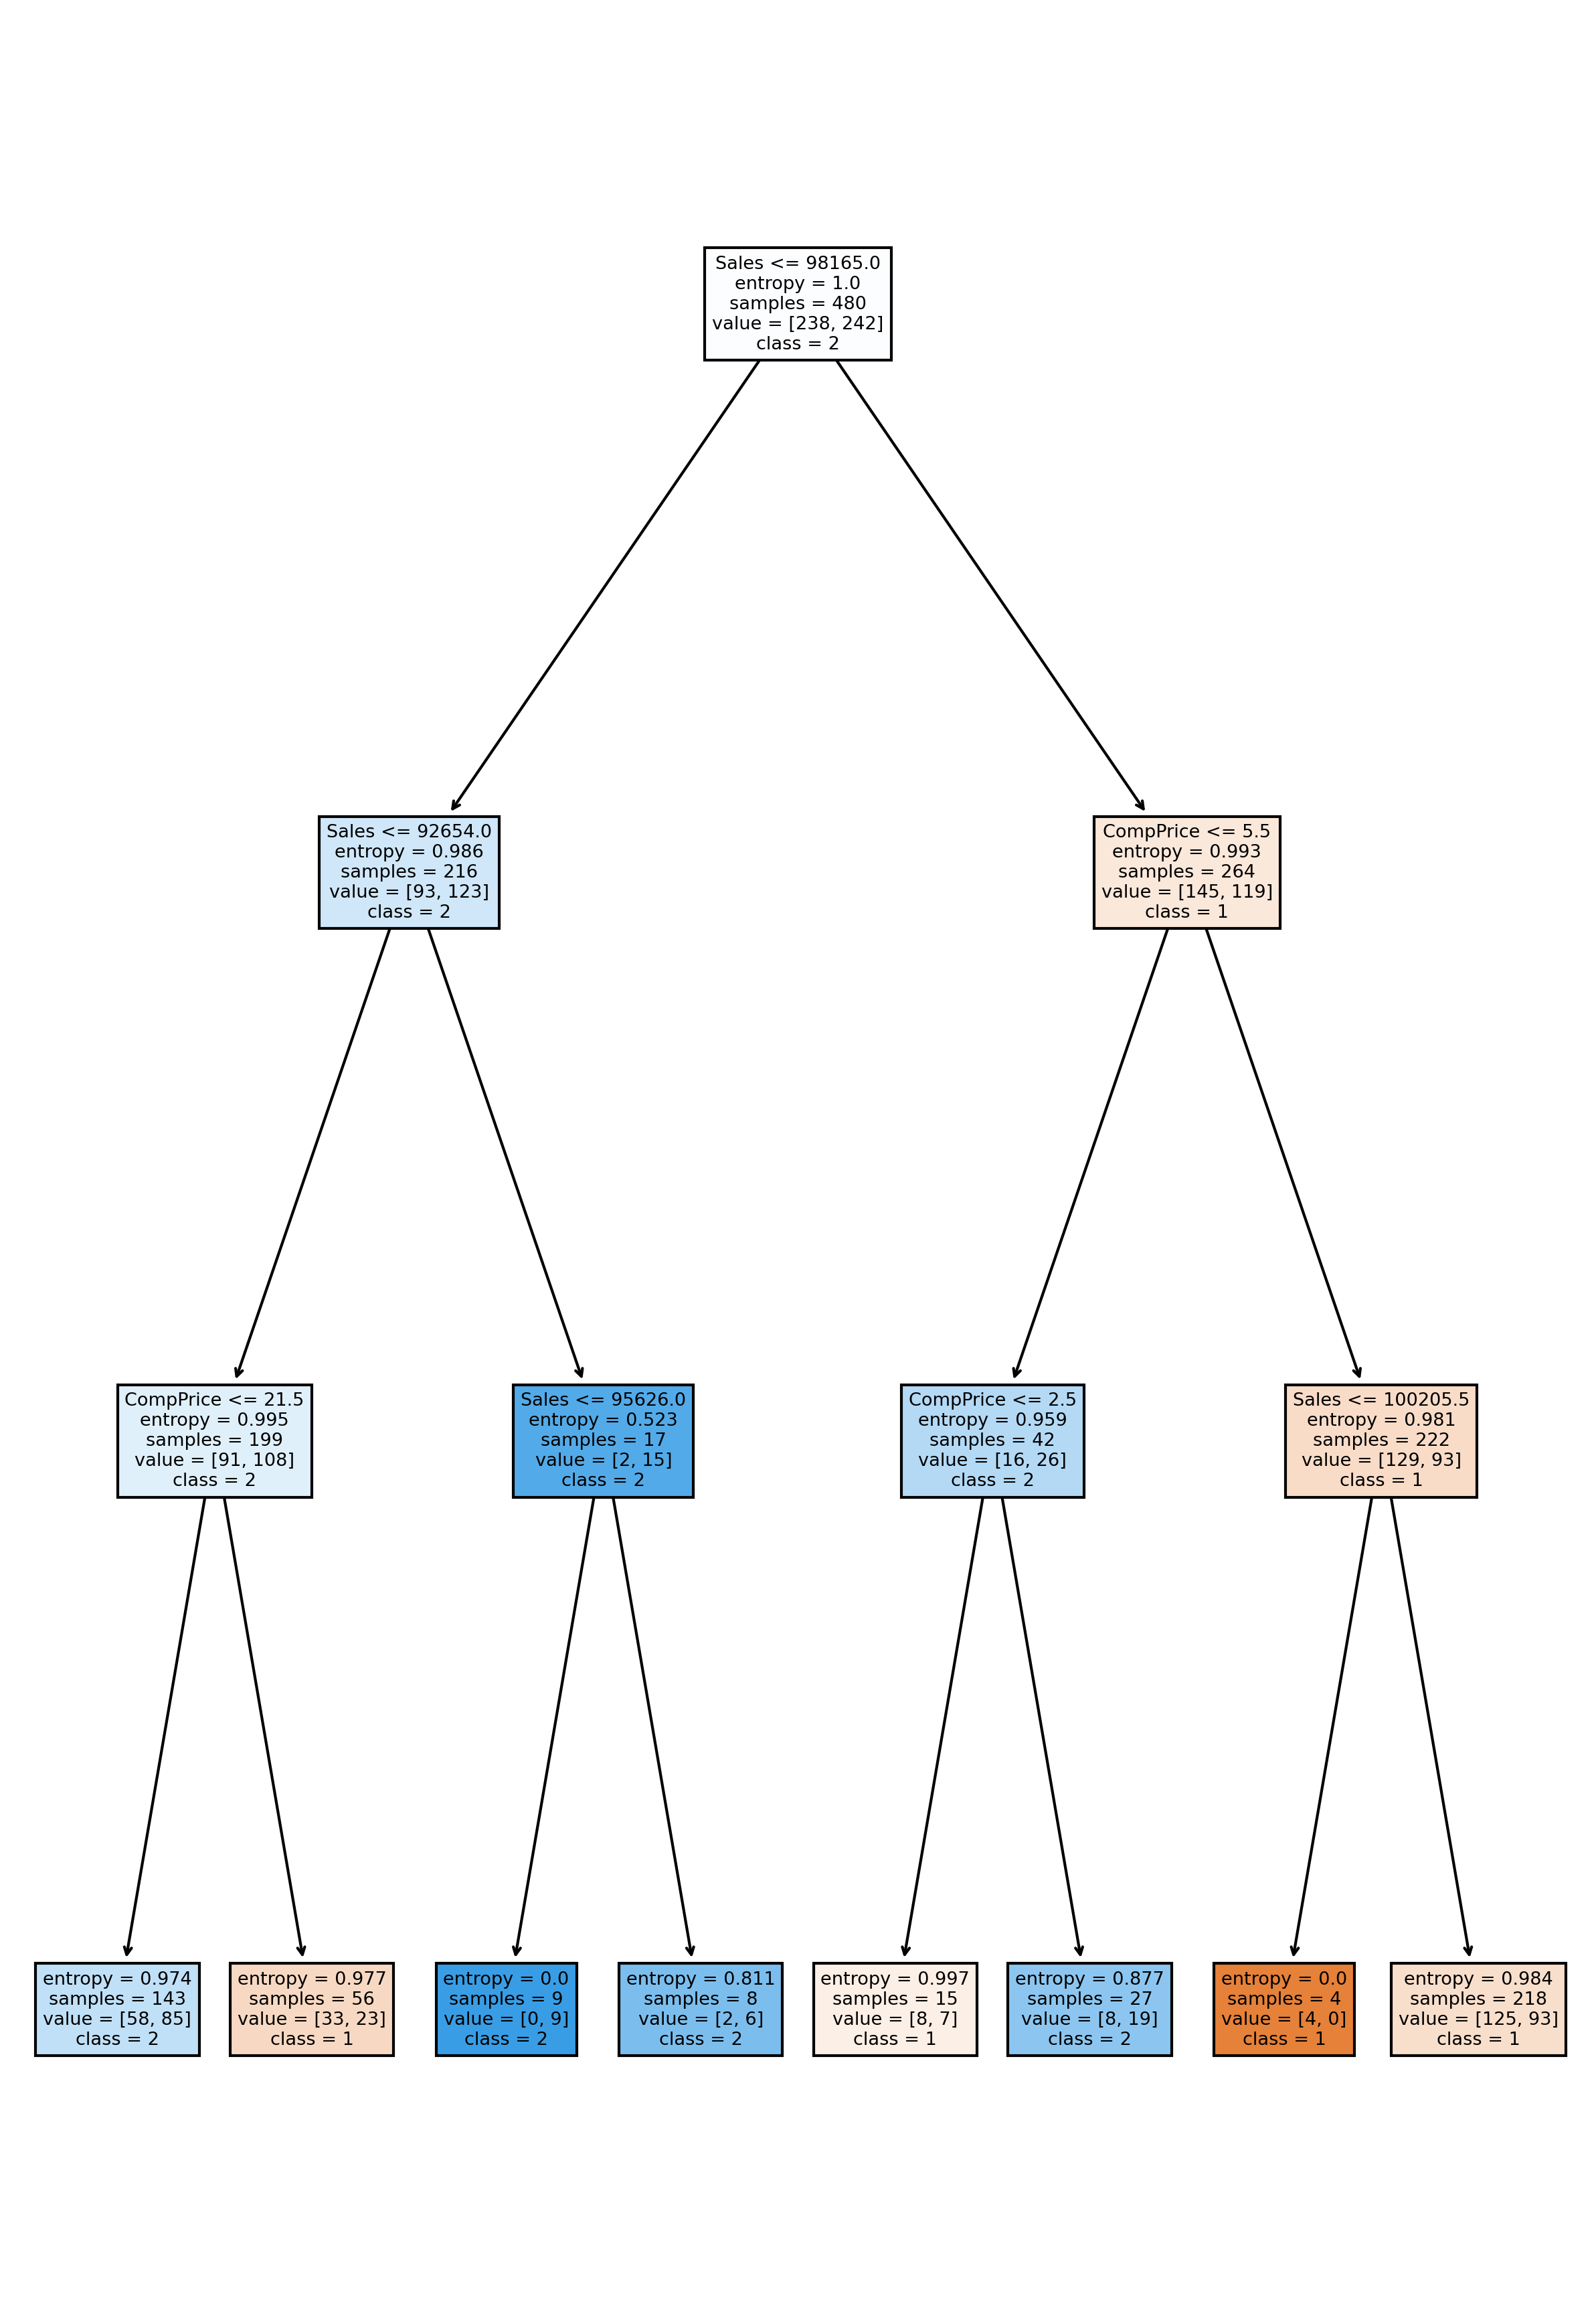

In [47]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,15), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    75
1    45
dtype: int64

In [37]:
preds

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=uint8)

In [38]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,40,20
1,35,25


In [39]:
# Accuracy 
np.mean(preds==y_test)

0.5416666666666666

# Building decision tree classifier (CART) using Gini criteria

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [41]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
#Prediction and computing the accuracy
preds=model_gini.predict(x_test)
np.mean(preds==y_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        60
           1       0.56      0.42      0.48        60

    accuracy                           0.54       120
   macro avg       0.54      0.54      0.53       120
weighted avg       0.54      0.54      0.53       120



# Running the decision tree classifier on whole data

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_gini.fit(x, y)
#Prediction and computing the accuracy
preds=model_gini.predict(x)
np.mean(preds==y)

0.7966666666666666

In [44]:
pd.crosstab(y,preds)

col_0,0.0,1.0
TaxInc_Good,,
0.0,2,122
1.0,0,476
